# Singular Spectrum Analysis (SSA)

[pyts のサンプル](https://pyts.readthedocs.io/en/stable/auto_examples/decomposition/plot_ssa.html) を試す．


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

In [2]:
# parameters
n_samples, n_timestamps = 100, 256
dt = 0.01
f1, f2 = 10, 20
t = np.arange(0, n_timestamps * dt, dt)
freq = np.linspace(0, 1. / dt, n_timestamps)

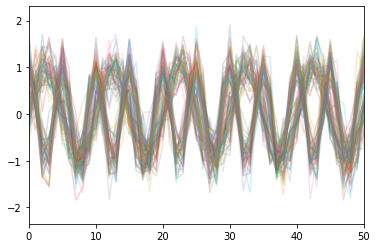

In [21]:
# X = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + 0.3 * np.random.randn(n_samples, n_timestamps)
X = np.concatenate([
    np.sin(2 * np.pi * f1 * t) + .3 * np.random.randn(n_samples // 2, n_timestamps),
    np.cos(2 * np.pi * f2 * t) + .3 * np.random.randn(n_samples // 2, n_timestamps),
])

plt.plot(X.T, alpha=0.2)
plt.xlim(0, 50)
plt.show()

In [54]:
ssa = SingularSpectrumAnalysis(
    window_size=128,
    # groups=[np.arange(i, i+50) for i in range(0, 100, 50)],
    groups=5
    # groups=None,
)
X_ssa = ssa.fit_transform(X)
X_ssa.shape

(100, 5, 256)

In [55]:
ssa.get_params()

{'groups': 5, 'window_size': 128}

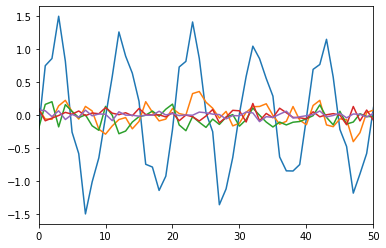

In [56]:
plt.plot(X_ssa[5].T)
plt.xlim(0, 50)
plt.show()

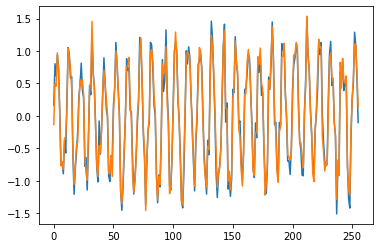

In [58]:
i = 3
n_components = 2
plt.plot(X[i], label='original')
plt.plot(np.sum(X_ssa[i,:n_components], axis=0), label='restored')
plt.show()

## パート 2

[写経](https://ni4muraano.hatenablog.com/entry/2017/02/04/230543)

In [39]:
class SSA(object):
    def __init__(self, signal, window_size):
        self.__signal_length = len(signal)
        self.__window_size = window_size
        X = self.__create_trajectory_matrix(signal, window_size)
        self.__U, self.__W, self.__V = np.linalg.svd(X, False)
        
    def __create_trajectory_matrix(self, signal, window_size):
        """軌道行列の生成
        $$
        M_{i,:} = signal_{i,i+N}
        $$
        $0 \leq i \leq L-W+1$
        $N$ はウィンドウサイズ．$L$ は信号の長さ．
        """
        row = len(signal) - window_size + 1
        col = window_size
        trajectory_matrix = np.empty((row, col))
        for i in range(row):
            trajectory_matrix[i, :] = signal[i: i + window_size]
        return trajectory_matrix
    
    def restore_signal(self, num_component):
        """信号の復元"""
        # 軌道行列の復元
        X = np.zeros((self.__U.shape[0], self.__window_size))
        for i in range(num_component):
            λ = self.__W[i]
            U = (self.__U[:, i])[:, np.newaxis]
            V = (self.__V[i, :])[np.newaxis, :]
            X += λ * U * V
            
        # 軌道行列から信号を復元
        signal = list()
        for i in range(self.__signal_length):
            value = 0.
            count = 0
            for j in range(X.shape[1]):
                row = i - j
                if (row < 0):
                    break
                elif (row >= X.shape[0]):
                    continue
                col = j
                value += X[row, col]
                count += 1
            value /= count
            signal.append(value)
        return np.array(signal)

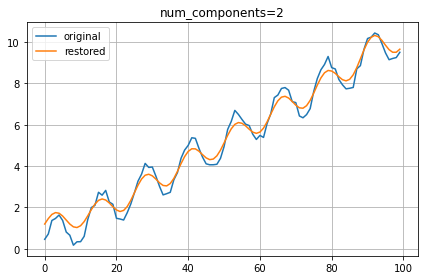

In [40]:
# 各種パラメータ
x = np.arange(100)
window_size = 20
num_components = 2
# 信号の生成
signal1 = x / 10
signal2 = np.random.rand(len(x)) / 2
signal3 = np.sin(x / 2)
signal = signal1 + signal2 + signal3
# 特異スペクトル解析
ssa = SSA(signal, window_size)
restored_signal = ssa.restore_signal(num_components)

plt.title(f"{num_components=}")
plt.plot(signal, label='original')
plt.plot(restored_signal, label='restored')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()